# 案例：评委打分
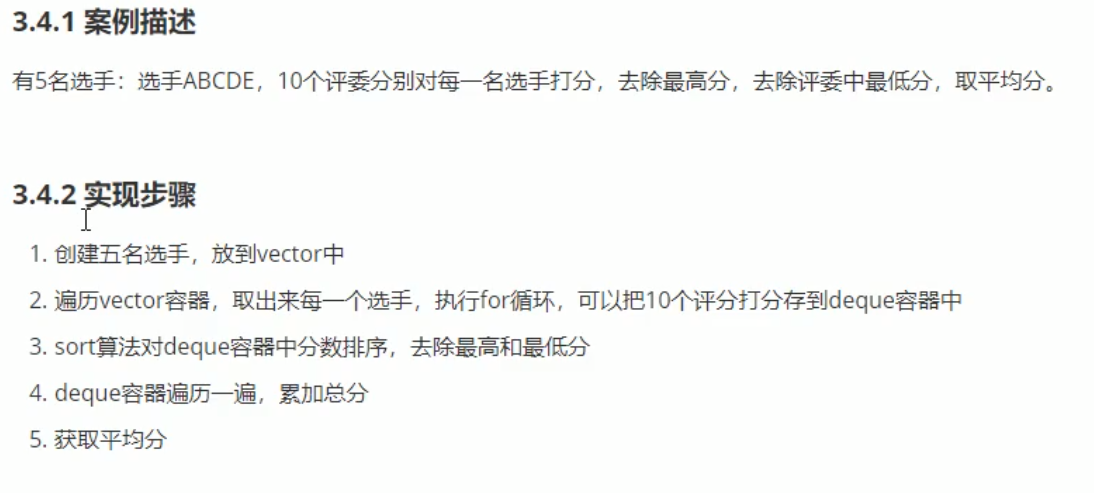


In [7]:
#include<iostream>
#include<vector>
#include<deque>
#include<algorithm>
using namespace std;

In [8]:
class Person{
public:
    Person(string name, int score){
        this->m_name = name;
        this->m_score = score;
    }
    
    string m_name;
    int m_score;
    
};

In [9]:
void createPerson(vector<Person> &v, int num){
    string nameSeed = "ABCDE";
    for(int i = 0; i < num; i++){
        string name = "选手";
        name = name + nameSeed[i];
        int score = 0;
        
        Person p(name, score); //创建对应的对象
        v.push_back(p); //存放选手数据
        
    }
}

In [10]:
void printVector(const vector<Person> & v){
    for(vector<Person>::const_iterator it = v.begin(); it != v.end(); it++){
        cout<<"选手的姓名"<<(*it).m_name<<"得分:"<<(*it).m_score<<endl;
    }
}

In [11]:
void get_score(vector<Person> &v, int num_pingwei){
      for(vector<Person>::iterator it = v.begin(); it != v.end(); it++){
          //将评委分数放到deque容器中
        deque<int> d_score;
        for(int i = 0; i < num_pingwei; i ++){
            int score = rand()%41 +60; //得到60-100之间的随机数
            d_score.push_back(score);
        }
          
          cout<<"选手"<<it->m_name<<"得分："<<endl;
         for(deque<int>::iterator dit = d_score.begin(); dit != d_score.end(); dit++){
              cout<<*dit<<" ";
          }
          cout<<endl;
        sort(d_score.begin(), d_score.end()); //利用sort算法进行排序
        d_score.pop_back();  //去掉一个最高分
        d_score.pop_front(); //去掉一个最低分，头删法
        //计算平均分
          int sum = 0;
          for(deque<int>::iterator dit = d_score.begin(); dit != d_score.end(); dit++){
              sum  = sum + (*dit);
          }
        (*it).m_score = sum/(num_pingwei - 2); //将最终得分替换为score
            
    }
}

In [12]:
void test01(){
    
    int num_xuanshou = 5;
    int num_pingwei = 10;
    vector<Person> v; //创建一个Person数据类型的vector容器
    createPerson(v, num_xuanshou);
    printVector(v);
    get_score(v, num_pingwei);
        printVector(v);
  
}

test01();

选手的姓名选手A得分:0
选手的姓名选手B得分:0
选手的姓名选手C得分:0
选手的姓名选手D得分:0
选手的姓名选手E得分:0
选手选手A得分：
79 65 62 68 89 80 74 89 68 87 
选手选手B得分：
90 83 67 79 60 65 97 73 81 85 
选手选手C得分：
70 91 99 82 85 83 76 85 74 76 
选手选手D得分：
67 95 63 86 61 65 98 75 62 75 
选手选手E得分：
60 97 74 69 98 63 80 75 82 77 
选手的姓名选手A得分:76
选手的姓名选手B得分:77
选手的姓名选手C得分:81
选手的姓名选手D得分:73
选手的姓名选手E得分:77


# STL案例2-员工分组
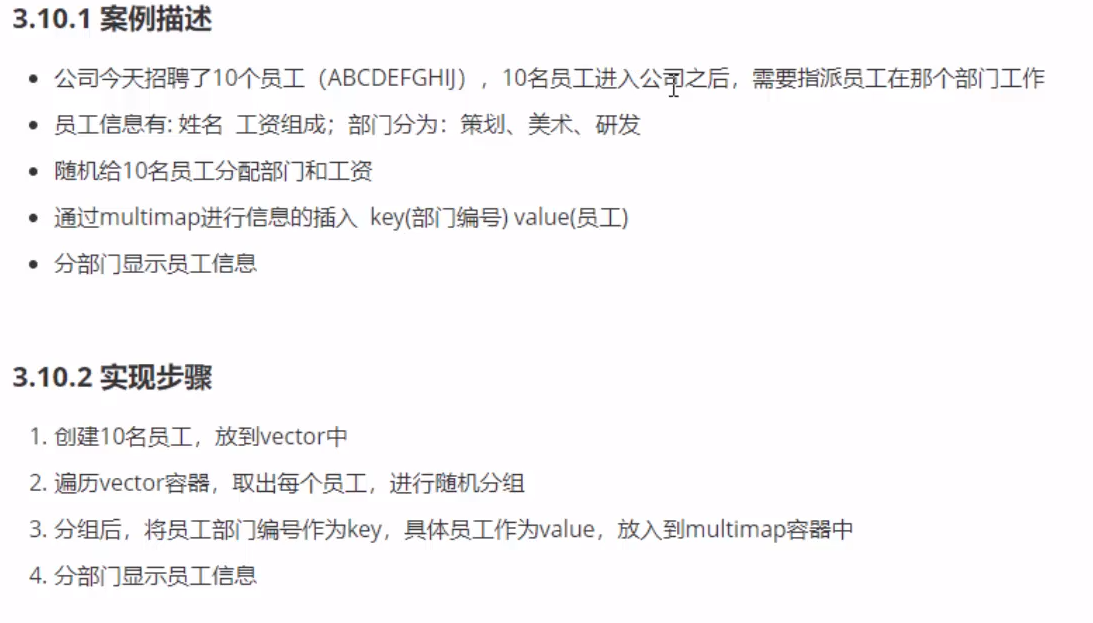


In [7]:
//员工分组代码实例
//员工类声明
class Worker{
    public:
        Worker(string name, string dType, int salary){
            this->m_name = name;
            this->m_salary = salary;
            this->m_dType = dType;
        }
    
    string m_name;
    string m_dType;
    int m_salary;
};

In [8]:
//员工信息生成
void gen_worker(vector<Worker> & v, int number){
    string nameSeed = "ABCDEFGHIJ";
    
    for(int i = 0; i < number; i++){
        string name = "Woker";
        string dType = "临时工";
        name = name + nameSeed[i];
        int salary = rand() % 2001 + 3000; //定义薪资水平为3000-5000
        int dID = rand() % 3 + 1; //随机生成员工的部门编号
        if(dID == 1){
            dType = "策划";
        }
        else if(dID ==2){
             dType = "美术";
        }
        else{
            dType = "开发";
        }
        Worker w(name, dType, salary);
        v.push_back(w);  //向vector容器中插入生成的员工
    }
}

In [9]:
//构建打印显示的函数
void print_worker(const vector<Worker> & wv){
    for(vector<Worker>::const_iterator vit = wv.begin(); vit != wv.end(); vit++){
        cout<<"员工姓名:"<<vit->m_name<<"，员工部门:"<<vit->m_dType <<"，员工薪水:"<<vit->m_salary <<endl;
    }
}

In [10]:
//自定义数据类型的排序规则
//multimap中默认根据key从小到大排序
class myRule{
    public:
        bool operator()(int dID1, int dID2){
            return dID1 > dID2;
        }
};

In [11]:
//构建分部门显示员工信息的函数
void print_dep(const multimap<int, Worker> & m){
    for(multimap<int, Worker>::const_iterator mit = m.begin(); mit != m.end(); mit++)
    {
        cout<<"部门"<<mit->first<<"有这些员工:"<<endl;
        cout<<"员工姓名:"<<mit->second.m_name<<"，员工薪水:"<<mit->second.m_salary <<endl;
    }
}

In [12]:
//B站的按部门打印显示实现
void showWorkerByGroup(multimap<int, Worker> &m){
    cout<<"策划部门职工:"<<endl;
    
    multimap<int, Worker>::iterator pos1 = m.find(1);
    int count = m.count(1); //统计该部门具体人数
    int index  = 0;
    for(; pos1 != m.end() && index < count; pos1++){
                cout<<"员工姓名:"<<pos1->second.m_name<<"，员工薪水:"<<pos1->second.m_salary <<endl;
        index++;
    }
    
        cout<<"美术部门职工:"<<endl;
    
    multimap<int, Worker>::iterator pos2 = m.find(2);
    count = m.count(2); //统计该部门具体人数
    index  = 0;
    for(; pos2!= m.end() && index < count; pos2++){
                cout<<"员工姓名:"<<pos2->second.m_name<<"，员工薪水:"<<pos2->second.m_salary <<endl;
        index++;
    }
    
        cout<<"开发部门职工:"<<endl;
    
    multimap<int, Worker>::iterator pos3 = m.find(3);
    count = m.count(3); //统计该部门具体人数
    index  = 0;
    for(; pos3 != m.end() && index < count; pos3++){
                cout<<"员工姓名:"<<pos3->second.m_name<<"，员工薪水:"<<pos3->second.m_salary <<endl;
        index++;
    }
}

In [13]:
//函数实现
void test01(){
    int number = 10; //共有10个员工
    vector<Worker> v;
    gen_worker(v, 10); //生成10个员工的基本信息
    //打印显示当前构建的员工信息
    print_worker(v);
    
    //构建multismap容器
    multimap<int, Worker> m; //key(部门编号)，策划：1，美术：2，开发：3
    //遍历每个员工
    for(vector<Worker>::const_iterator vit = v.begin(); vit != v.end(); vit++){
        if(vit->m_dType == "策划"){
            m.insert(make_pair(1, *vit));
        }
        else if(vit->m_dType == "美术"){
            m.insert(make_pair(2, *vit));
        }
        else{
            m.insert(make_pair(3, *vit));
        }
    }
    
//     print_dep(m); //自己构建的打印函数
    showWorkerByGroup(m);  //B站的打印函数
    
    //构建multimap容器，key为部门编号，value为对应的vector容器
    multimap<int, vector<Worker>> m1;
    
}

test01();

员工姓名:WokerA，员工部门:策划，员工薪水:3110
员工姓名:WokerB，员工部门:开发，员工薪水:4407
员工姓名:WokerC，员工部门:开发，员工薪水:4221
员工姓名:WokerD，员工部门:开发，员工薪水:4413
员工姓名:WokerE，员工部门:策划，员工薪水:4734
员工姓名:WokerF，员工部门:美术，员工薪水:4909
员工姓名:WokerG，员工部门:开发，员工薪水:4068
员工姓名:WokerH，员工部门:策划，员工薪水:4151
员工姓名:WokerI，员工部门:美术，员工薪水:4977
员工姓名:WokerJ，员工部门:开发，员工薪水:3315
策划部门职工:
员工姓名:WokerA，员工薪水:3110
员工姓名:WokerE，员工薪水:4734
员工姓名:WokerH，员工薪水:4151
美术部门职工:
员工姓名:WokerF，员工薪水:4909
员工姓名:WokerI，员工薪水:4977
开发部门职工:
员工姓名:WokerB，员工薪水:4407
员工姓名:WokerC，员工薪水:4221
员工姓名:WokerD，员工薪水:4413
员工姓名:WokerG，员工薪水:4068
员工姓名:WokerJ，员工薪水:3315


In [14]:
#include<vector>
#include<map>
#include<iostream>

using namespace std;

In [15]:
//重新定义worker类
class Worker2{
    public:
        Worker2(string name, int salary){
            this->m_name = name;
            this->m_salary = salary;
        }
    
        string m_name;
        int m_salary;
};

In [16]:
//随机生成员工信息
void gen_worker(vector<Worker2> & v, int number){
    string nameSeed = "ABCDEFGHIJ";
    for(int i = 0; i < number; i++){
        string name = "员工";
        name = name + nameSeed[i];
        int salary = rand()% 6001 + 6000; //随机薪资水平在6000-12000
        Worker2 w(name, salary);
        
        v.push_back(w);  //将员工信息放在vector容器中
        
    }
}

In [17]:
//构建打印显示的函数
void print_worker2(const vector<Worker2> & wv){
    for(vector<Worker2>::const_iterator vit = wv.begin(); vit != wv.end(); vit++){
        cout<<"员工姓名:"<<vit->m_name<<"，员工薪水:"<<vit->m_salary <<endl;
    }
}

In [24]:
void print_multimap(const multimap<string, vector<Worker2>> & m){
    for(multimap<string, vector<Worker2>>::const_iterator mit = m.begin(); mit != m.end(); mit++){
//         cout<<"name："<< mit->second.m_name<<"salary:"<<m->second.m_salary<<endl;  
        //这段会报错，是因为map容器的value是vector
        cout<<mit->first<<"部门有如下员工:"<<endl;
        vector<Worker2> vtemp = mit->second;
        for(vector<Worker2>::iterator vit = vtemp.begin(); vit !=vtemp.end(); vit++){
                cout<<"name："<< vit->m_name<<"salary:"<<vit->m_salary<<endl;          
        }
    }
}

In [25]:
 //构建multimap容器，key为部门编号，value为对应的vector容器
void test02(){
    vector<Worker2> v1,v2,v3;
    
    int num1 = 5;
    int num2 = 3;
    int num3 = 2;
    gen_worker(v1, num1);
    gen_worker(v2, num2);
    gen_worker(v3, num3);
    
    print_worker2(v1);  //显示策划部门员工
    print_worker2(v2); //显示美工部门员工
    print_worker2(v3); //显示开发部门员工
    multimap<string, vector<Worker2>> m;
    
    //将各部门员工分类插入multimap
    m.insert(make_pair("策划", v1));
    m.insert(pair<string, vector<Worker2>>("美工", v2));
    m.insert(make_pair("开发", v3));
    
    print_multimap(m);
}

test02();

员工姓名:员工A，员工薪水:11089
员工姓名:员工B，员工薪水:10963
员工姓名:员工C，员工薪水:11333
员工姓名:员工D，员工薪水:7659
员工姓名:员工E，员工薪水:7906
员工姓名:员工A，员工薪水:6457
员工姓名:员工B，员工薪水:6423
员工姓名:员工C，员工薪水:11542
员工姓名:员工A，员工薪水:8842
员工姓名:员工B，员工薪水:11646
开发部门有如下员工:
name：员工Asalary:8842
name：员工Bsalary:11646
策划部门有如下员工:
name：员工Asalary:11089
name：员工Bsalary:10963
name：员工Csalary:11333
name：员工Dsalary:7659
name：员工Esalary:7906
美工部门有如下员工:
name：员工Asalary:6457
name：员工Bsalary:6423
name：员工Csalary:11542
